In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

#my util
import sys
sys.path.append('../src')

#plot setting
import myplot
myplot.setting_myplot()

import warnings
warnings.filterwarnings('ignore')

#trainとtestの重なり用
from matplotlib_venn import venn2
from tqdm import tqdm_notebook as tqdm

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows',100)
pd.set_option("display.max_seq_item",150)
pd.set_option("display.width",None)

### train,testのカラム

- 用途：細分化してget_dummies

In [19]:
train = pd.read_csv('../raw_data/train_data.csv')
test = pd.read_csv('../raw_data/test_data.csv')
published = pd.read_csv('../raw_data/published_land_price.csv')

print(train.shape,test.shape)

(356344, 28) (34844, 27)


### trainのカラム

- 種類：['中古マンション等', '宅地(土地と建物)', '宅地(土地)', '林地', '農地']⇒ラベルエンコード
- 地域：['商業地', '住宅地', '工業地', '宅地見込地']⇒ラベルエンコード
- 市区町村コード：地区名と被ってない
- 都道府県名：東京しかないので削除
- 市区町村名：市区町村名と完全に一致、削除
- 地区名：市区町村コードとかぶってない
- 最寄駅：名称
- 最寄駅：距離（分）：〇〇分～〇〇分を数値に変換してfloat
- 間取り：numとLやDが含まれているかをone hot vector化
- 面積：2000以上などを数値に変換してfloat
- 土地の形状：順序変数に変換したものを作った
- 間口：float
- 延べ床面積：2000以上などを数値に変換してfloat
- 建築年：西暦に変換
- 建物の構造：⇒'、'でsplitしてダミー変数化した
- 用途：splitしてダミー変数化した
- 今後の利用目的：['住宅' 'その他' '事務所' nan '店舗' '倉庫' '工場']⇒ラベルエンコード
- 前面道路（方位）：ラベルエンコード
- 前面道路（種類）：ラベルエンコード
- 前面道路（幅員）：数値変換なしにfloatで
- 都市計画：ラベルエンコード
- 建ぺい率：数値変換なしにfloatで
- 容積率：同上
- 取引時点：何年か、四半期のいつかのカラムを作成
- 改装：改装したか否か⇒ラベルエンコード
- 取引の事情など：splitしてダミー変数化した

In [4]:
train['種類'].unique()

array(['中古マンション等', '宅地(土地と建物)', '宅地(土地)', '林地', '農地'], dtype=object)

In [5]:
train['地域'].unique()

array([nan, '商業地', '住宅地', '工業地', '宅地見込地'], dtype=object)

In [6]:
train['市区町村コード'].unique()

array([13101, 13102, 13103, 13104, 13105, 13106, 13107, 13108, 13109,
       13110, 13111, 13112, 13113, 13114, 13115, 13116, 13117, 13118,
       13119, 13120, 13121, 13122, 13123, 13201, 13202, 13203, 13204,
       13205, 13206, 13207, 13208, 13209, 13210, 13211, 13212, 13213,
       13214, 13215, 13218, 13219, 13220, 13221, 13222, 13223, 13224,
       13225, 13227, 13228, 13229, 13303, 13305, 13307, 13308, 13361,
       13363, 13364, 13381, 13401, 13421], dtype=int64)

In [7]:
train['地区名'].unique()

array(['飯田橋', '一番町', '岩本町', ..., '大字長岡下師岡', '切欠', '字金長'], dtype=object)

In [8]:
train['最寄駅：名称'].unique()

array(['飯田橋', '九段下', '水道橋', '麹町', '半蔵門', '秋葉原', '岩本町', '神田(東京)', '小伝馬町',
       '新日本橋', '馬喰町', '大手町(東京)', '小川町(東京)', '溜池山王', '淡路町', '新御茶ノ水', '浅草橋',
       '神保町', '御茶ノ水', '竹橋', '四ツ谷', '市ケ谷', '末広町(東京)', '湯島', '永田町', '馬喰横山',
       '日比谷', '新富町(東京)', '築地', '八丁堀(東京)', '勝どき', '京橋(東京)', '宝町(東京)', '東京',
       '銀座', '銀座一丁目', '汐留', '新橋', '築地市場', '東銀座', '茅場町', '月島', '日本橋(東京)',
       '水天宮前', '人形町', '三越前', '浜町', '東日本橋', '青山一丁目', '赤坂(東京)', '赤坂見附',
       '乃木坂', '六本木', '麻布十番', '神谷町', '六本木一丁目', '芝浦ふ頭', '竹芝', '田町(東京)',
       '浜松町', '日の出', '表参道', '外苑前', '北品川', '品川', '天王洲アイル', nan, '赤羽橋',
       '芝公園', '大門(東京)', '三田(東京)', '泉岳寺', '御成門', '白金台', '白金高輪', '広尾',
       '高輪台', '目黒', '内幸町', 'お台場海浜公園', '虎ノ門', '曙橋', '四谷三丁目', '江戸川橋', '神楽坂',
       '牛込柳町', '牛込神楽坂', '早稲田(メトロ)', '新大久保', '高田馬場', '西早稲田', '東新宿', '新宿',
       '新宿三丁目', '落合(東京)', '下落合', '中井', '東中野', '若松河田', '大久保(東京)', '中野坂上',
       '西新宿', '信濃町', '椎名町', '目白', '新宿御苑前', '国立競技場', '千駄ケ谷', '新井薬師前',
       '落合南長崎', '新江古田', '東長崎', '新宿西口', '都庁前', '西新宿五丁目', '初台',

In [9]:
train['最寄駅：距離（分）'].unique()

array(['1', '5', '3', '4', '2', nan, '8', '7', '6', '0', '11', '10', '9',
       '12', '30分?60分', '13', '14', '16', '15', '19', '20', '18', '21',
       '2H?', '1H30?2H', '23', '25', '17', '29', '28', '26', '24', '22',
       '1H?1H30', '27'], dtype=object)

In [10]:
train['間取り'].unique()

array(['２ＬＤＫ', '１Ｋ', '１ＬＤＫ', '１Ｒ', nan, '３ＬＤＫ', '１ＤＫ＋Ｓ', '３ＤＫ', '１ＤＫ',
       '２ＤＫ', 'オープンフロア', '４ＬＤＫ', '１Ｋ＋Ｓ', '１ＬＤＫ＋Ｓ', '２ＬＤＫ＋Ｓ', 'スタジオ', '２Ｋ',
       '２ＤＫ＋Ｓ', '３ＬＤＫ＋Ｓ', '３Ｋ', '４ＤＫ', '５ＬＤＫ＋Ｓ', '７ＬＤＫ', '２Ｋ＋Ｓ', 'メゾネット',
       '５ＬＤＫ', '３ＤＫ＋Ｓ', '４Ｋ', '４ＬＤＫ＋Ｓ', '２ＬＤ', '３ＬＫ', '１Ｒ＋Ｓ', '１ＬＫ',
       '２ＬＤ＋Ｓ', '５ＤＫ', '１Ｌ', '２ＬＫ＋Ｓ', '６ＬＤＫ', '２ＬＫ', '１Ｌ＋Ｓ', '６ＬＤＫ＋Ｓ',
       '６ＤＫ', '４ＤＫ＋Ｓ', '３Ｋ＋Ｓ', '３ＬＤ＋Ｓ', '１ＬＤ＋Ｓ', '３ＬＤ', '２Ｄ', '３ＬＤＫ＋Ｋ'],
      dtype=object)

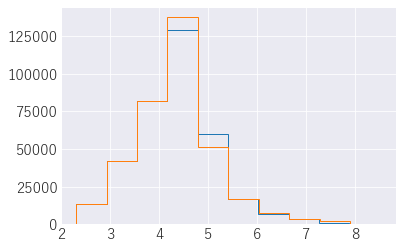

In [11]:
plt.hist(np.log(train['面積（㎡）'].replace({'2000㎡以上':np.nan,'5000㎡以上':np.nan}).astype(float).dropna()),histtype='step')
plt.hist(np.log(train['面積（㎡）'].replace({'2000㎡以上':2000,'5000㎡以上':5000}).astype(float).dropna()),histtype='step')
plt.show()

In [12]:
train['建物の構造'].value_counts()

ＲＣ                 115324
木造                  95139
ＳＲＣ                 51926
鉄骨造                 11199
軽量鉄骨造                2695
ＲＣ、木造                 661
鉄骨造、木造                170
ＲＣ、鉄骨造                117
ＳＲＣ、ＲＣ                110
ブロック造                  95
木造、軽量鉄骨造               16
木造、ブロック造               13
鉄骨造、軽量鉄骨造               8
ＳＲＣ、鉄骨造                 8
ＲＣ、軽量鉄骨造                7
ＲＣ、鉄骨造、木造               5
ＲＣ、木造、ブロック造             5
鉄骨造、ブロック造               5
ＳＲＣ、木造                  4
ＲＣ、ブロック造                4
ＲＣ、鉄骨造、ブロック造            1
鉄骨造、木造、軽量鉄骨造            1
ＲＣ、鉄骨造、木造、ブロック造         1
ブロック造、軽量鉄骨造             1
Name: 建物の構造, dtype: int64

In [13]:
train['取引の事情等'].value_counts()

私道を含む取引                  18728
調停・競売等                    5458
隣地の購入                     1805
関係者間取引                    1195
調停・競売等、私道を含む取引             424
隣地の購入、私道を含む取引              189
その他事情有り                    104
関係者間取引、私道を含む取引             100
隣地の購入、関係者間取引                33
他の権利・負担付き                   29
瑕疵有りの可能性                    27
古屋付き・取壊し前提                  13
私道を含む取引、その他事情有り              9
隣地の購入、関係者間取引、私道を含む取引         5
瑕疵有りの可能性、私道を含む取引             4
古屋付き・取壊し前提、私道を含む取引           2
他の権利・負担付き、私道を含む取引            2
隣地の購入、その他事情有り                2
関係者間取引、調停・競売等、私道を含む取引        1
隣地の購入、調停・競売等、私道を含む取引         1
隣地の購入、調停・競売等                 1
調停・競売等、その他事情有り               1
隣地の購入、瑕疵有りの可能性               1
古屋付き・取壊し前提、瑕疵有りの可能性          1
他の権利・負担付き、調停・競売等             1
Name: 取引の事情等, dtype: int64

In [14]:
print(train['取引時点'].unique())
print(len(train['取引時点'].unique()))

['2017年第４四半期' '2017年第３四半期' '2017年第２四半期' '2017年第１四半期' '2016年第４四半期'
 '2016年第３四半期' '2016年第２四半期' '2016年第１四半期' '2015年第４四半期' '2015年第３四半期'
 '2015年第２四半期' '2015年第１四半期' '2014年第４四半期' '2014年第３四半期' '2014年第２四半期'
 '2014年第１四半期' '2010年第４四半期' '2010年第３四半期' '2010年第２四半期' '2010年第１四半期'
 '2011年第４四半期' '2011年第３四半期' '2011年第２四半期' '2011年第１四半期' '2012年第４四半期'
 '2012年第３四半期' '2012年第１四半期' '2012年第２四半期' '2013年第４四半期' '2013年第３四半期'
 '2013年第２四半期' '2013年第１四半期' '2009年第４四半期' '2009年第３四半期' '2009年第２四半期'
 '2009年第１四半期' '2008年第４四半期' '2008年第３四半期' '2008年第２四半期' '2007年第４四半期'
 '2007年第３四半期' '2007年第１四半期' '2006年第４四半期' '2006年第３四半期' '2006年第２四半期'
 '2006年第１四半期' '2005年第４四半期' '2005年第３四半期' '2008年第１四半期' '2007年第２四半期']
50


In [15]:
print(test['取引時点'].unique())
print(len(test['取引時点'].unique()))

['2018年第４四半期' '2018年第３四半期' '2018年第２四半期' '2018年第１四半期' '2019年第１四半期']
5


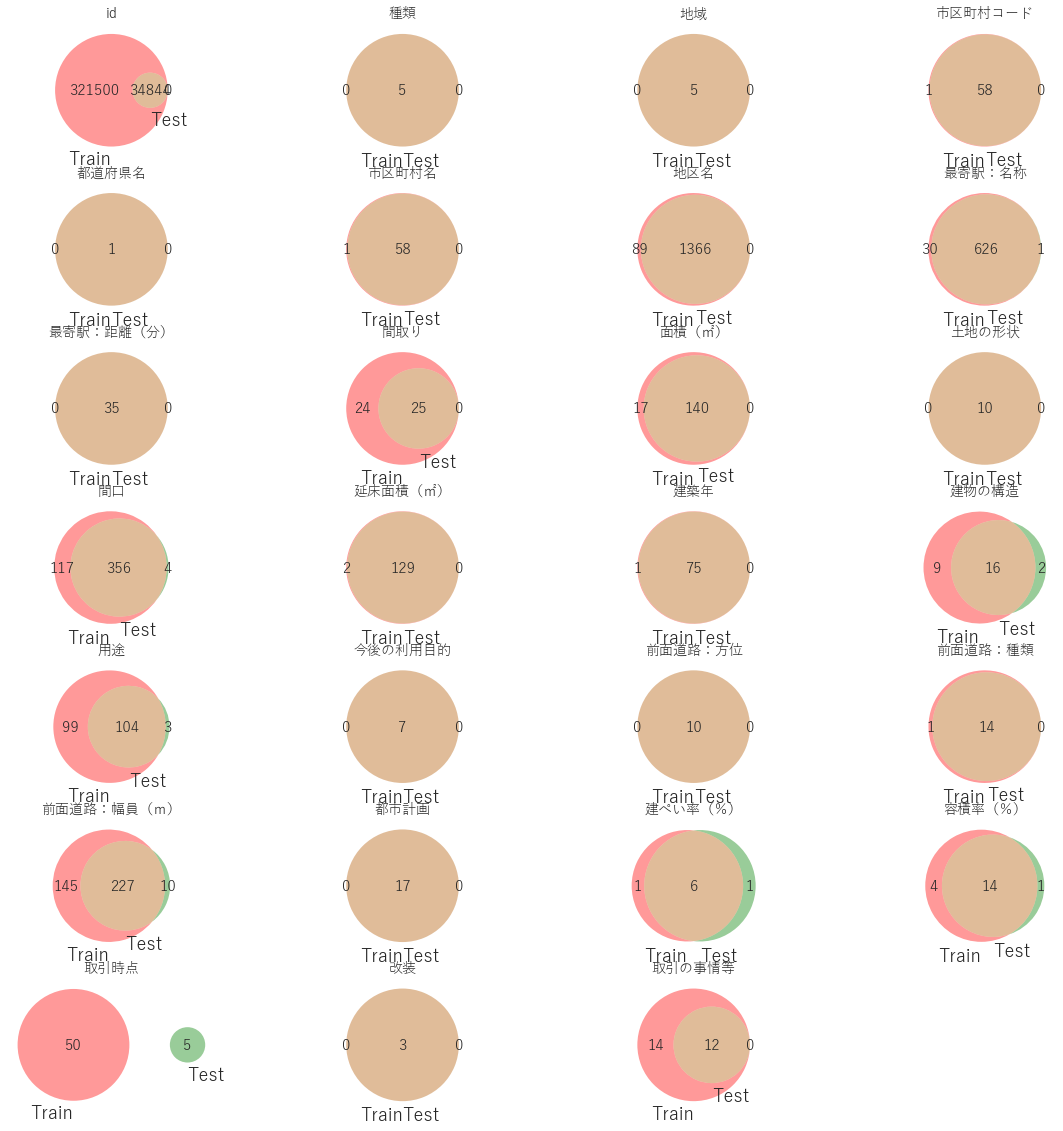

In [16]:
def draw_venn(df1, df2):
    
    df1_col = df1.columns.tolist()
    df2_col = df2.columns.tolist()
    
    # 短いほうを使う
    if len(df1_col) > len(df2_col):
        df_col = df2_col
    else:
        df_col = df1_col
    
    plt.figure(figsize=(20,20), facecolor='w')
    
    c = 4
    r = (len(df_col) // c) + 1
    
    
    for i, col in tqdm(enumerate(df_col)):
        
        plt.subplot(r, c, i+1)
        s1 = set(df1[col].unique().tolist())
        s2 = set(df2[col].unique().tolist())
        venn2(subsets=[s1, s2], set_labels=['Train', 'Test'])
        plt.title(str(col), fontsize=14)

    plt.show()
    
    return df_col
df_col = draw_venn(train, test)

In [17]:
train['取引時点'].unique()

array(['2017年第４四半期', '2017年第３四半期', '2017年第２四半期', '2017年第１四半期',
       '2016年第４四半期', '2016年第３四半期', '2016年第２四半期', '2016年第１四半期',
       '2015年第４四半期', '2015年第３四半期', '2015年第２四半期', '2015年第１四半期',
       '2014年第４四半期', '2014年第３四半期', '2014年第２四半期', '2014年第１四半期',
       '2010年第４四半期', '2010年第３四半期', '2010年第２四半期', '2010年第１四半期',
       '2011年第４四半期', '2011年第３四半期', '2011年第２四半期', '2011年第１四半期',
       '2012年第４四半期', '2012年第３四半期', '2012年第１四半期', '2012年第２四半期',
       '2013年第４四半期', '2013年第３四半期', '2013年第２四半期', '2013年第１四半期',
       '2009年第４四半期', '2009年第３四半期', '2009年第２四半期', '2009年第１四半期',
       '2008年第４四半期', '2008年第３四半期', '2008年第２四半期', '2007年第４四半期',
       '2007年第３四半期', '2007年第１四半期', '2006年第４四半期', '2006年第３四半期',
       '2006年第２四半期', '2006年第１四半期', '2005年第４四半期', '2005年第３四半期',
       '2008年第１四半期', '2007年第２四半期'], dtype=object)

In [18]:
test['取引時点'].unique()

array(['2018年第４四半期', '2018年第３四半期', '2018年第２四半期', '2018年第１四半期',
       '2019年第１四半期'], dtype=object)